In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sales=pd.read_csv("C:/Users/98sun/Downloads/sales_data-set.csv")
features=pd.read_csv("C:/Users/98sun/Downloads/Features_data_set.csv")
stores=pd.read_csv("C:/Users/98sun/Downloads/stores_data-set.csv")

In [9]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [10]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [33]:
merged=sales.merge(features, how='inner', on=['Store','Date'])
merged=merged.merge(stores, on='Store')
merged_na=merged.dropna()
merged=merged.fillna(0)

In [91]:
merged

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,year_m,sum_sales
0,1,1,05/02/2010,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
1,1,2,05/02/2010,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
2,1,3,05/02/2010,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
3,1,4,05/02/2010,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
4,1,5,05/02/2010,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,2012/10,NaN
421566,45,94,26/10/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,2012/10,NaN
421567,45,95,26/10/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,2012/10,NaN
421568,45,97,26/10/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,2012/10,NaN


In [44]:
merged['year_m']=pd.to_datetime(merged['Date']).dt.strftime("%Y/%m")

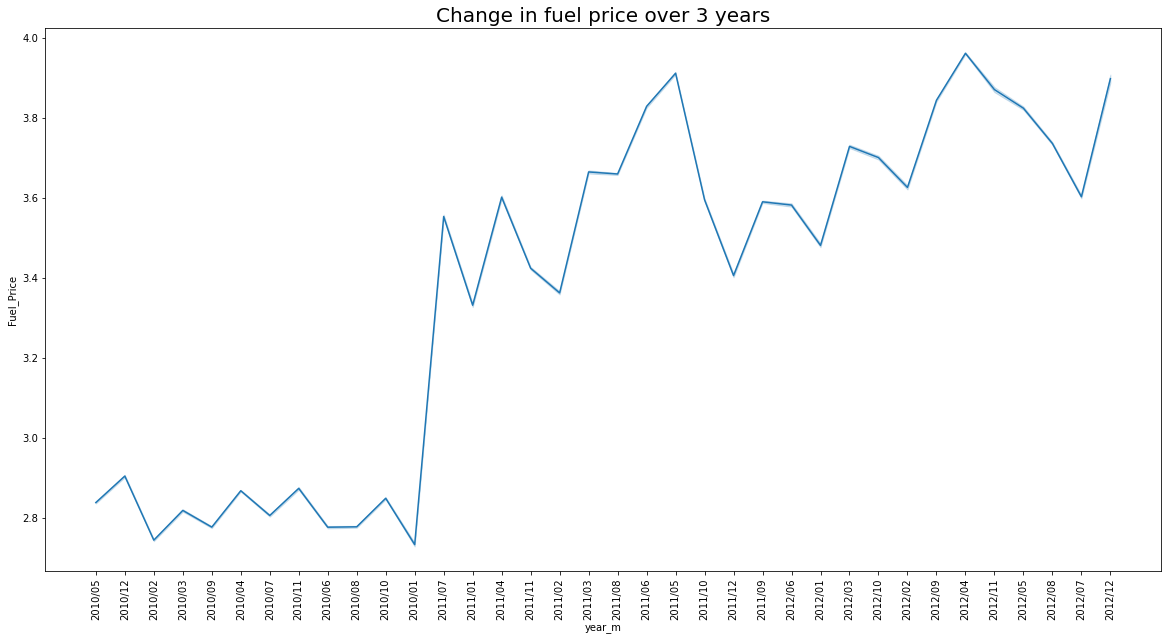

In [51]:
plt.subplots(figsize = (20,10))
plt.xticks(rotation = 90)
sns.lineplot(data = merged, x = 'year_m',y = 'Fuel_Price')
plt.title('Change in fuel price over 3 years', fontsize=20)
plt.show()

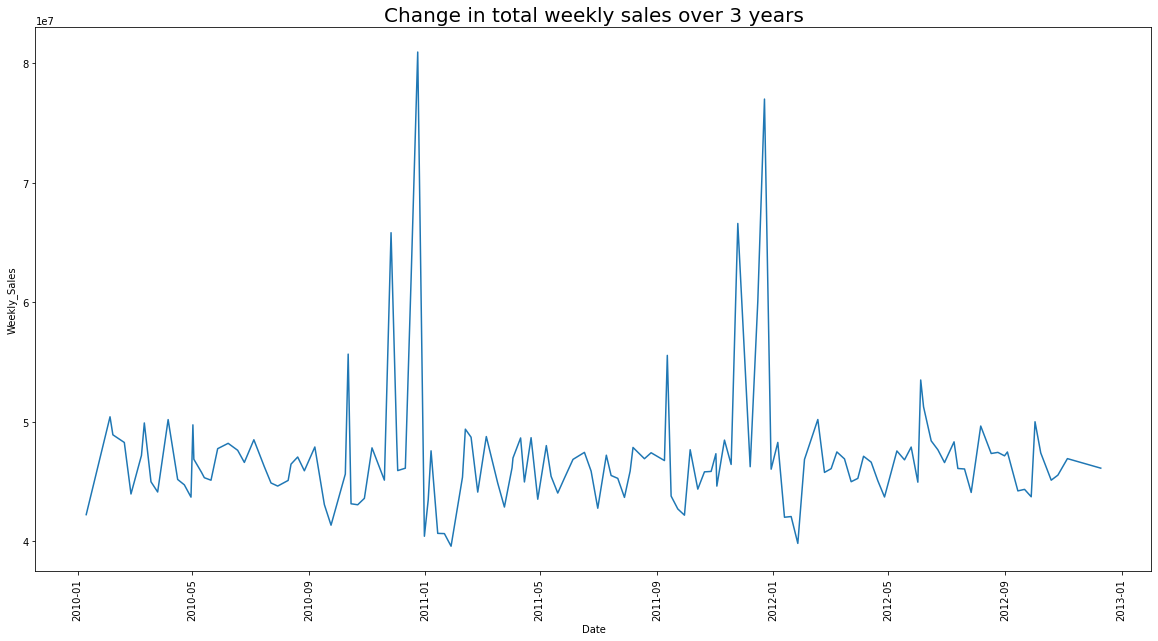

In [97]:
#df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
#df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)
merged['Date'] = pd.to_datetime(merged['Date'])
df_sales_sum=merged.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_sales_sum=df_sales_sum.sort_values("Date", ascending=True)


plt.subplots(figsize = (20,10))
plt.xticks(rotation = 90)
sns.lineplot(data = df_sales_sum, x = 'Date',y = 'Weekly_Sales')
plt.title('Change in total weekly sales over 3 years', fontsize=20)
plt.show()

In [90]:
df_sales_sum

,Date,Weekly_Sales
112,24/12/2010,80931415.60
107,23/12/2011,76998241.31
117,25/11/2011,66593605.26
122,26/11/2010,65821003.24
79,17/12/2010,61820799.85
...,...,...
62,14/01/2011,40673678.04
95,21/01/2011,40654648.03
142,31/12/2010,40432519.00
123,27/01/2012,39834974.67


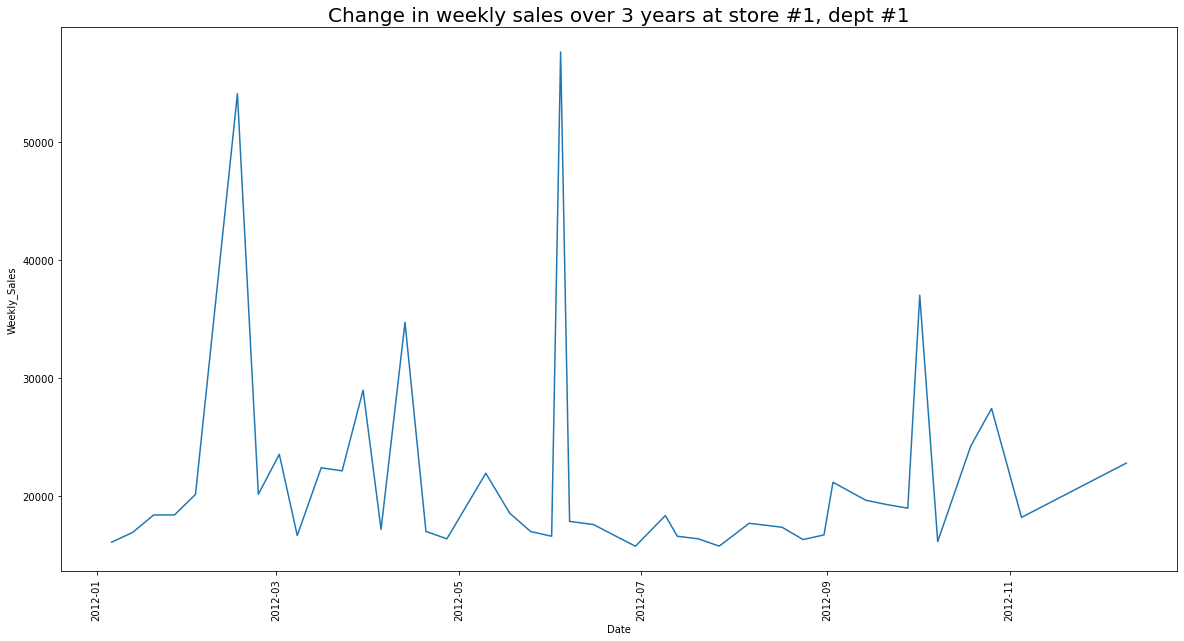

In [100]:
plt.subplots(figsize = (20,10))
plt.xticks(rotation = 90)
sns.lineplot(data = merged[(merged['Dept']==1)  & (merged['Store']==1) & (merged['Date'].dt.year==2012)], x = 'Date',y = 'Weekly_Sales', ci = 1)
plt.title('Change in weekly sales over 3 years at store #1, dept #1', fontsize=20)
plt.show()


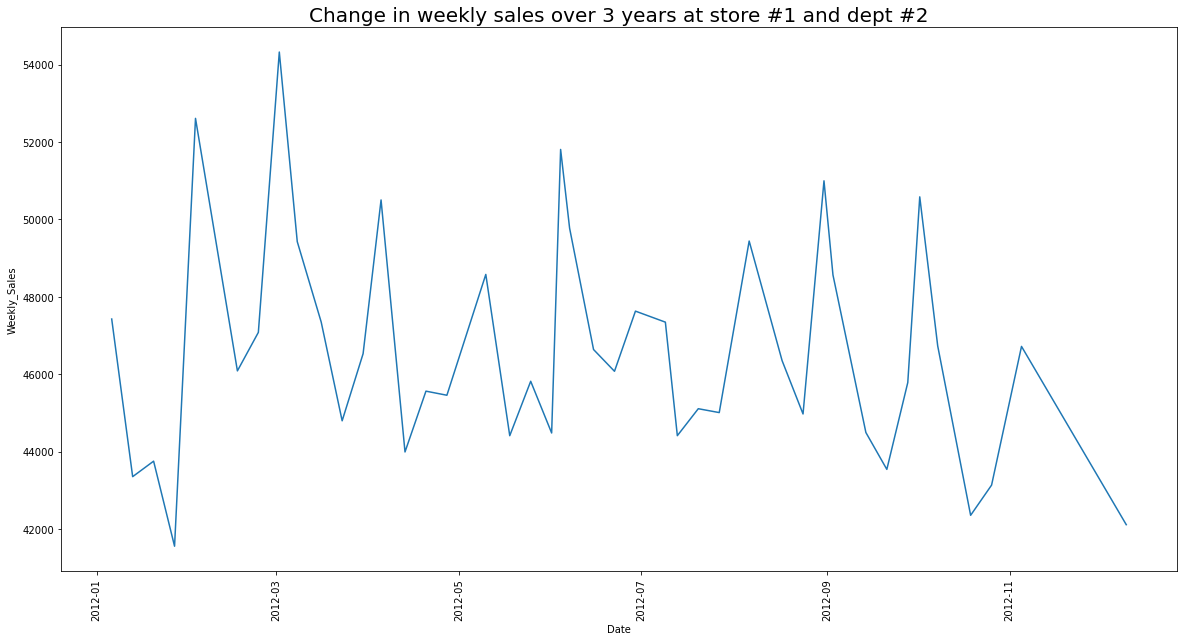

In [101]:
plt.subplots(figsize = (20,10))
plt.xticks(rotation = 90)
sns.lineplot(data = merged[(merged['Dept']==2)  & (merged['Store']==1) & (pd.to_datetime(merged['Date']).dt.year==2012)], x = 'Date',y = 'Weekly_Sales', ci = 1)
plt.title('Change in weekly sales over 3 years at store #1 and dept #2', fontsize=20)
plt.show()

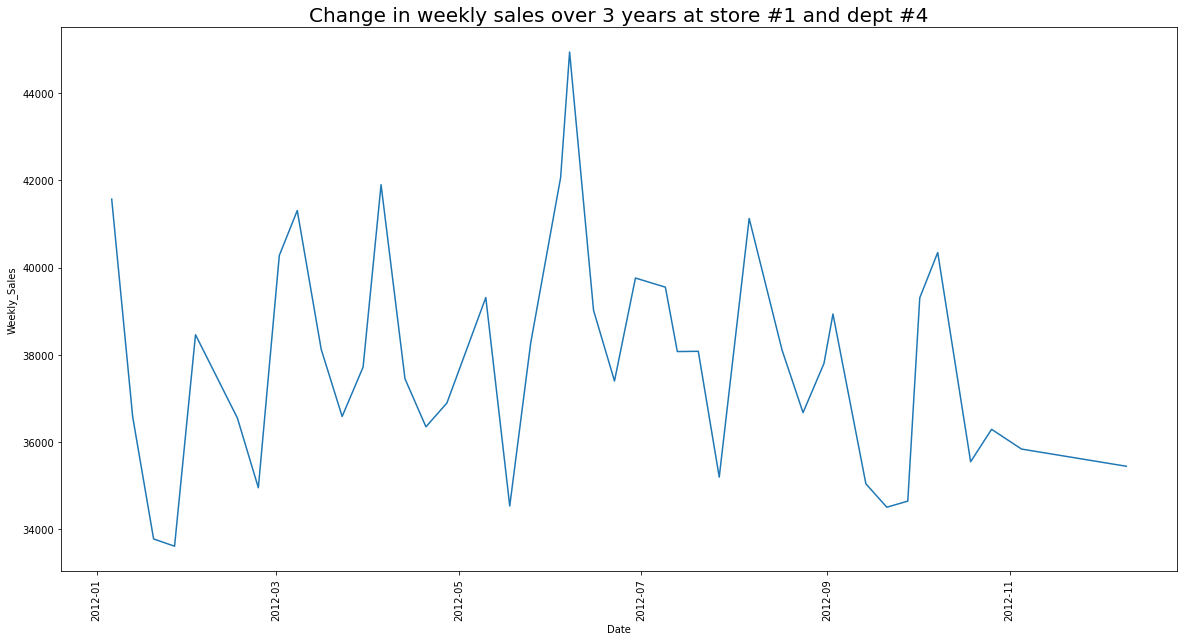

In [102]:
plt.subplots(figsize = (20,10))
plt.xticks(rotation = 90)
sns.lineplot(data = merged[(merged['Dept']==4)  & (merged['Store']==1) & (pd.to_datetime(merged['Date']).dt.year==2012)], x = 'Date',y = 'Weekly_Sales', ci = 1)
plt.title('Change in weekly sales over 3 years at store #1 and dept #4', fontsize=20)
plt.show()

In [104]:
import statsmodels.api as sm

y=merged['Weekly_Sales']
x=merged[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     327.5
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:07:06   Log-Likelihood:            -4.8255e+06
No. Observations:              421570   AIC:                         9.651e+06
Df Residuals:                  421561   BIC:                         9.651e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          2.2e+04    340.735     64.572      

In [107]:
import statsmodels.api as sm

y=merged['Weekly_Sales']
x=merged[['Temperature']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.254
Date:                Thu, 21 Apr 2022   Prob (F-statistic):              0.133
Time:                        22:09:16   Log-Likelihood:            -4.8268e+06
No. Observations:              421570   AIC:                         9.654e+06
Df Residuals:                  421568   BIC:                         9.654e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.615e+04    119.184    135.524      

In [108]:
import statsmodels.api as sm

y=merged['Weekly_Sales']
x=merged[['MarkDown1']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     940.2
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          3.06e-206
Time:                        22:09:50   Log-Likelihood:            -4.8263e+06
No. Observations:              421570   AIC:                         9.653e+06
Df Residuals:                  421568   BIC:                         9.653e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.552e+04     38.005    408.442      0.0

In [113]:
merged[merged['IsHoliday_y']==False]['Weekly_Sales'].describe()

count    391909.000000
mean      15901.445069
std       22330.747450
min       -4988.940000
25%        2079.750000
50%        7589.950000
75%       20131.210000
max      406988.630000
Name: Weekly_Sales, dtype: float64

In [114]:
merged[merged['IsHoliday_y']==True]['Weekly_Sales'].describe()

count     29661.000000
mean      17035.823187
std       27222.000409
min        -798.000000
25%        2078.540000
50%        7947.740000
75%       21189.250000
max      693099.360000
Name: Weekly_Sales, dtype: float64

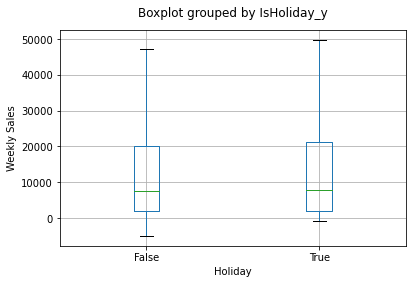

In [126]:
boxplot=merged[['Weekly_Sales','IsHoliday_y']].boxplot(by='IsHoliday_y', showfliers=False)
plt.xlabel("Holiday")
plt.ylabel("Weekly Sales")
plt.title("")
plt.show()

In [116]:
merged

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,year_m,sum_sales
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
1,1,2,2010-05-02,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
2,1,3,2010-05-02,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
3,1,4,2010-05-02,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
4,1,5,2010-05-02,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,2012/10,NaN
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,2012/10,NaN
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,2012/10,NaN
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,2012/10,NaN
